In [37]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Define the file path
file_path = "/Users/garn195/Project Repositories/PauliTrans/Benchmarking_Stats/circuit_stats_save.json"

# Define the keys you want to import
keys = ["proc time", "opt time", "num_qubits", "raw T gates", "optimized T gates", "optimize iteration", 
        "optimize T ratio", "raw layer", "optimized layers", "optimized layer ratio", 
        "raw weights", "optimized weights"]

# Dictionary to store the filtered data
python_data = {}

# Load the JSON data from the file
if os.path.exists(file_path):
    with open(file_path, "r") as file:
        full_data = json.load(file)

    # Filter the data based on the keys
    for filename, stats in full_data.items():
        filtered_stats = {key: stats[key] for key in keys if key in stats}
        python_data[filename+".txt"] = filtered_stats

    print("Filtered data successfully loaded.")
else:
    print(f"File {file_path} not found!")

print(python_data)


Filtered data successfully loaded.
{'qft_n18_iter2.txt': {'proc time': 1.2574601400010579, 'opt time': 287.8823108789984, 'num_qubits': 18, 'raw T gates': 14383, 'optimized T gates': 11463, 'optimize iteration': 2, 'optimize T ratio': 0.20301745115761663, 'raw layer': 4311, 'optimized layers': 4311, 'optimized layer ratio': 0.0, 'raw weights': 2.975735242995203, 'optimized weights': 5.611881706359592}, 'adder_n10.txt': {'proc time': 0.0033999130009760847, 'opt time': 0.020381702001031954, 'num_qubits': 10, 'raw T gates': 88, 'optimized T gates': 32, 'optimize iteration': 3, 'optimize T ratio': 0.6363636363636364, 'raw layer': 10, 'optimized layers': 7, 'optimized layer ratio': 0.30000000000000004, 'raw weights': 3.272727272727273, 'optimized weights': 6.5}, 'adder_n4.txt': {'proc time': 0.000833557998703327, 'opt time': 0.0006275910000113072, 'num_qubits': 4, 'raw T gates': 4, 'optimized T gates': 4, 'optimize iteration': 1, 'optimize T ratio': 0.0, 'raw layer': 1, 'optimized layers': 

In [38]:
folder_path = "/Users/garn195/Project Repositories/NWQ-Sim/stabilizer/stab_T_bench"  # Folder containing text files
keys = ["proc time", "opt time", "raw T gates", "optimized T gates", "optimize iteration", "total gates"]
stab_data = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, "r") as file:
            lines = [line.strip() for line in file]

        if len(lines) != len(keys):
            raise ValueError(f"File {filename} does not match expected number of lines!")

        stab_data[filename] = dict(zip(keys, lines))

print(stab_data)

{'multiplier_n15.txt': {'proc time': '0.001217', 'opt time': '0.001943', 'raw T gates': '144', 'optimized T gates': '42', 'optimize iteration': '2', 'total gates': '454'}, 'adder_n4.txt': {'proc time': '5e-05', 'opt time': '1.7e-05', 'raw T gates': '4', 'optimized T gates': '4', 'optimize iteration': '1', 'total gates': '25'}, 'multiplier_n45.txt': {'proc time': '0.073921', 'opt time': '0.22876', 'raw T gates': '1512', 'optimized T gates': '396', 'optimize iteration': '2', 'total gates': '4574'}, 'adder_n10.txt': {'proc time': '0.00058', 'opt time': '0.00088', 'raw T gates': '88', 'optimized T gates': '48', 'optimize iteration': '2', 'total gates': '189'}, 'qft_n18_iter2.txt': {'proc time': '1.94885', 'opt time': '10.0613', 'raw T gates': '14383', 'optimized T gates': '11463', 'optimize iteration': '2', 'total gates': '27292'}, 'qft_n18_iter1.txt': {'proc time': '0.03493', 'opt time': '0.181106', 'raw T gates': '1677', 'optimized T gates': '1333', 'optimize iteration': '2', 'total gate

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Renaming circuits
circuit_rename = {
    'adder_n4.txt': 'Adder (4)',
    'adder_n10.txt': 'Adder (10)',
    'qft_n18_iter1.txt': 'QFT (18, 1)',
    'qft_n18_iter2.txt': 'QFT (18, 2)',
    'multiplier_n15.txt': 'Mult (15)',
    'multiplier_n45.txt': 'Mult (45)',
}

table_data = []

for filename, stats in python_data.items():
    circuit_name = circuit_rename.get(filename, filename) 

    raw_t_gates = stats.get("raw T gates", "N/A")
    optimized_t_gates = stats.get("optimized T gates", "N/A")
    raw_t_layers = stats.get("raw layer", "N/A")
    opt_t_layers = stats.get("optimized layers", "N/A")

    # Compute Optimized T Ratio
    if isinstance(raw_t_gates, (int, float)) and isinstance(optimized_t_gates, (int, float)) and optimized_t_gates != 0:
        optimized_t_ratio = f"{round(raw_t_gates / optimized_t_gates, 2)}x"
    else:
        optimized_t_ratio = "N/A"

    table_data.append([circuit_name, raw_t_gates, optimized_t_gates, optimized_t_ratio])

# Create DataFrame with normalized column names
df = pd.DataFrame(table_data, columns=["Circuit", "T Gates", "T Rotations", "T Ratio"])

# Convert 'T Gates' to numeric and sort
df["T Gates"] = pd.to_numeric(df["T Gates"], errors='coerce')
df = df.sort_values(by="T Gates", ascending=True)

# Save to CSV
df.to_csv('sorted_circuit_stats_table.csv', index=False)

# Plot
fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('off')

# Draw table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(16)

for (i, j), cell in table.get_celld().items():
    cell.set_height(0.14)

plt.savefig('graphics/circuit_stats.pdf', bbox_inches='tight', dpi=300)
plt.close()

# Print
print(df)


       Circuit  T Gates  T Rotations T Ratio
2    Adder (4)        4            4    1.0x
1   Adder (10)       88           32   2.75x
3    Mult (15)      144           42   3.43x
4    Mult (45)     1512          396   3.82x
5  QFT (18, 1)     1677         1333   1.26x
0  QFT (18, 2)    14383        11463   1.25x


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Renaming circuits (assuming python_data is already defined)
circuit_rename = {
    'adder_n4.txt': 'Adder (4)',
    'adder_n10.txt': 'Adder (10)',
    'qft_n18_iter1.txt': 'QFT (18, 1)',
    'qft_n18_iter2.txt': 'QFT (18, 2)',
    'multiplier_n15.txt': 'Mult (15)',
    'multiplier_n45.txt': 'Mult (45)',
}

table_data = []

for filename, stats in python_data.items():
    circuit_name = circuit_rename.get(filename, filename) 

    raw_t_gates = stats.get("raw T gates", "N/A")
    optimized_t_gates = stats.get("optimized T gates", "N/A")
    raw_t_layers = stats.get("raw layer", "N/A")
    opt_t_layers = stats.get("optimized layers", "N/A")

    
    # Compute Optimized T Ratio as Optimized T Gates / Raw T Gates, truncated to 2 decimal places
    if isinstance(raw_t_gates, (int, float)) and raw_t_gates != 0:
        optimized_t_ratio = round(raw_t_layers/opt_t_layers,2)  # Truncate to 2 decimal places
    else:
        optimized_t_ratio = "N/A"

    table_data.append([circuit_name, raw_t_layers, opt_t_layers, optimized_t_ratio])

# Create DataFrame with updated column names
df = pd.DataFrame(table_data, columns=["Circuit", "T Layers", "Opt T Layers", "T Layer Ratio"])

# Convert 'Raw T Gates' to numeric and sort by it
df["T Layers"] = pd.to_numeric(df["T Layers"], errors='coerce')
df = df.sort_values(by="T Layers", ascending=True)

# Save the DataFrame to a CSV (optional)
df.to_csv('sorted_circuit_layers_table.csv', index=False)

# Plot the table as a PDF with adjusted text size and spacing
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted figure size for more space (taller)

ax.axis('off')  # Turn off the axis

# Create the table and render it
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=["#f2f2f2"]*len(df.columns))

# Adjust the font size globally for the entire table
table.auto_set_font_size(False)  # Disable auto font size adjustment
table.set_fontsize(24)  # Set a global font size (larger size)

# Adjust cell height to avoid excessive whitespace
for (i, j), cell in table.get_celld().items():
    # Increase height of cells to fill more space
    cell.set_height(0.14)  # Adjust cell height

# Save the table as a PDF
plt.savefig('graphics/circuit_layers.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
plt.close()

# Print the DataFrame for verification
print(df)


       Circuit  T Layers  Opt T Layers  T Layer Ratio
2    Adder (4)         1             1           1.00
3    Mult (15)         8             8           1.00
1   Adder (10)        10             7           1.43
4    Mult (45)       128           128           1.00
5  QFT (18, 1)       869           869           1.00
0  QFT (18, 2)      4311          4311           1.00


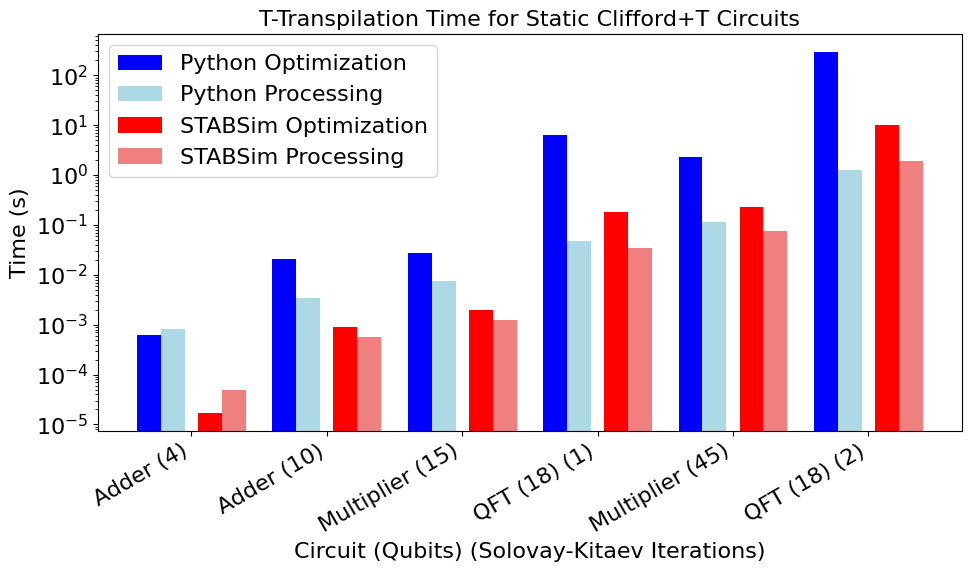

In [41]:
# Update font settings
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'figure.titlesize': 16
})

# Custom labels and matching keys
keys = ['adder_n4.txt', 'adder_n10.txt', 'qft_n18_iter1.txt', 'qft_n18_iter2.txt', 'multiplier_n15.txt', 'multiplier_n45.txt']
labels = ['Adder (4)', 'Adder (10)', 'QFT (18) (1)', 'QFT (18) (2)', 'Multiplier (15)', 'Multiplier (45)']

# Extract times
stab_opt = [float(stab_data[key]['opt time']) for key in keys]
stab_proc = [float(stab_data[key]['proc time']) for key in keys]
python_opt = [float(python_data[key]['opt time']) for key in keys]
python_proc = [float(python_data[key]['proc time']) for key in keys]

# Total STABSim times for sorting
total_times_stab = [opt + proc for opt, proc in zip(stab_opt, stab_proc)]
sorted_indices = np.argsort(total_times_stab)

# Sort everything accordingly
sorted_labels = [labels[i] for i in sorted_indices]
stab_opt = [stab_opt[i] for i in sorted_indices]
stab_proc = [stab_proc[i] for i in sorted_indices]
python_opt = [python_opt[i] for i in sorted_indices]
python_proc = [python_proc[i] for i in sorted_indices]

# Plotting
n_groups = len(sorted_labels)
group_spacing = 0.3  # spacing between groups
bar_width = 0.18     # width of each bar
bar_gap = 0.05       # additional gap between Python and STABSim bars within a group
x = np.arange(n_groups) * (4 * bar_width + group_spacing)

fig, ax = plt.subplots(figsize=(10, 6))

# Positions for each bar group with space between Python and STABSim bars
ax.bar(x - 1.5 * bar_width - bar_gap, python_opt, width=bar_width, color='blue', label='Python Optimization')
ax.bar(x - 0.5 * bar_width - bar_gap, python_proc, width=bar_width, color='lightblue', label='Python Processing')
ax.bar(x + 0.5 * bar_width + bar_gap, stab_opt, width=bar_width, color='red', label='STABSim Optimization')
ax.bar(x + 1.5 * bar_width + bar_gap, stab_proc, width=bar_width, color='lightcoral', label='STABSim Processing')

ax.set_ylabel('Time (s)')
ax.set_xlabel('Circuit (Qubits) (Solovay-Kitaev Iterations)')
ax.set_title('T-Transpilation Time for Static Clifford+T Circuits')
ax.set_xticks(x)
ax.set_xticklabels(sorted_labels, rotation=30, ha='right')
ax.set_yscale("log", base=10)
ax.legend()

plt.tight_layout()
plt.savefig('graphics/t_trans_time.pdf', format='pdf')

plt.show()


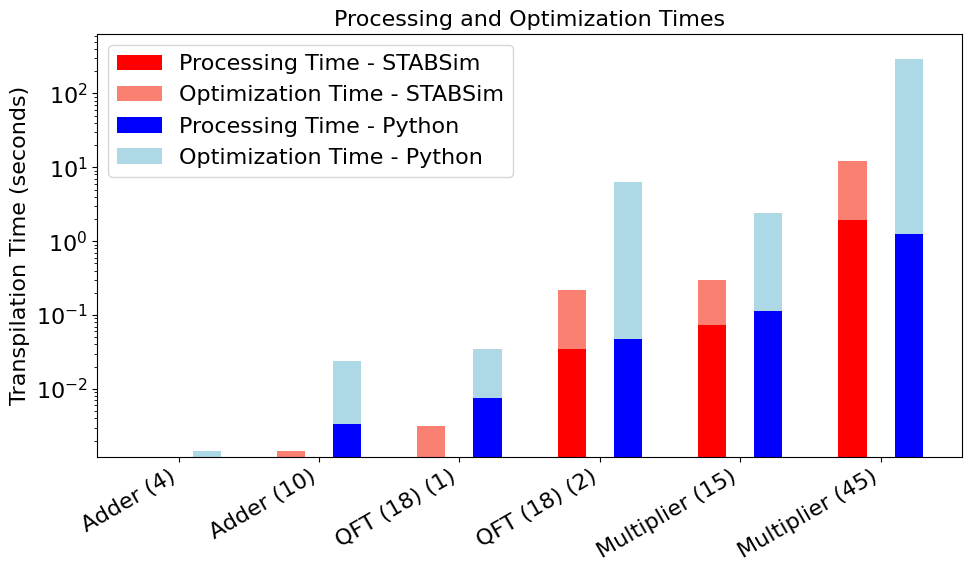

In [42]:

# Extract and compute total times
times = [(key, label, 
          float(stab_data[key]['proc time']), 
          float(stab_data[key]['opt time']),
          float(python_data[key]['proc time']), 
          float(python_data[key]['opt time']), 
          ) 
         for key, label in zip(keys, labels)]

# Sort by total (proc + opt) time (Python)
times.sort(key=lambda x: x[2] + x[3])  

# Unpack sorted data
sorted_keys, sorted_labels, proc_times1, opt_times1, proc_times2, opt_times2 = zip(*times)

x = np.arange(len(sorted_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, proc_times1, width, label='Processing Time - STABSim', color='red')
ax.bar(x - width, opt_times1, width, bottom=proc_times1, label='Optimization Time - STABSim', color='salmon')
ax.bar(x + width, proc_times2, width, label='Processing Time - Python', color='blue')
ax.bar(x + width, opt_times2, width, bottom=proc_times2, label='Optimization Time - Python', color='lightblue')

# proc_times1_log = np.log10(proc_times1)
# opt_times1_log = np.log10(opt_times1)
# proc_times2_log = np.log10(proc_times2)
# opt_times2_log = np.log10(opt_times2)

# ax.bar(x - width, proc_times1_log, width, label='Proc Time - STABSim', color='blue')
# ax.bar(x - width, opt_times1_log, width, bottom=proc_times1_log, label='Opt Time - STABSim', color='lightblue')

# ax.bar(x + width, proc_times2_log, width, label='Proc Time - Python', color='red')
# ax.bar(x + width, opt_times2_log, width, bottom=proc_times2_log, label='Opt Time - Python', color='salmon')

ax.set_ylabel('Transpilation Time (seconds)')

ax.set_title('Processing and Optimization Times')
ax.set_xticks(x)
plt.yscale("log", base=10)
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

[0 1 2]
6


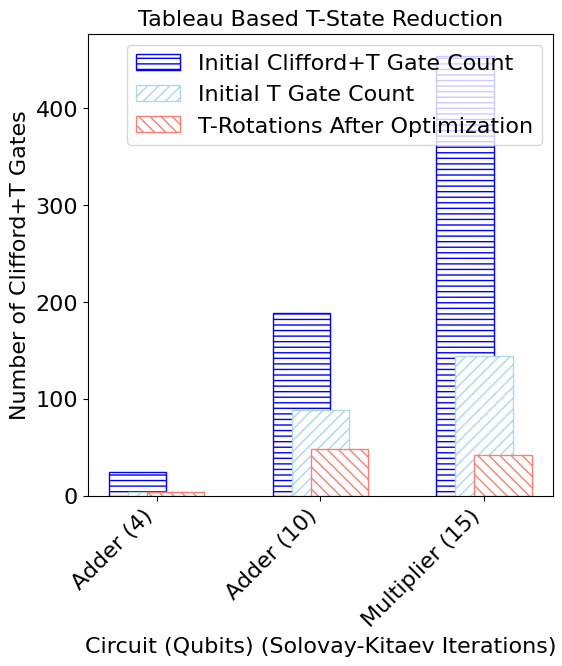

In [43]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Adder (4)', 'Adder (10)', 'Multiplier (15)']

sorted_stab_data = dict(sorted(stab_data.items(), key=lambda item: int(item[1]["total gates"])))

total_gates = [float(item['total gates']) for item in sorted_stab_data.values()]
raw_t_gates = [float(item['raw T gates']) for item in sorted_stab_data.values()]
optimized_t_gates = [float(item['optimized T gates']) for item in sorted_stab_data.values()]

sorted_total_gates = np.array(total_gates)
sorted_raw_t_gates = np.array(raw_t_gates)
sorted_optimized_t_gates = np.array(optimized_t_gates)

x = np.arange(len(labels))
print(x)
print(len(sorted_total_gates))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 6))
bars0 = ax.bar(x[0:3] - width/3, sorted_total_gates[0:3], width, 
               label='Initial Clifford+T Gate Count', color="white", edgecolor="blue", hatch='---')

bars1 = ax.bar(x[0:3], sorted_raw_t_gates[0:3], width, 
               label='Initial T Gate Count', color="white", edgecolor="lightblue", hatch='///')

bars2 = ax.bar(x[0:3] + width/3, sorted_optimized_t_gates[0:3], width, 
               label='T-Rotations After Optimization', color="white", edgecolor="salmon", hatch='\\\\\\')


# bars0 = ax.bar(x[0:3] - width/3, sorted_total_gates[0:3], width, label='Initial Clifford+T Gate Count', color="blue")
# bars1 = ax.bar(x[0:3], sorted_raw_t_gates[0:3], width, label='Inital T Gate Count', color="lightblue")
# bars2 = ax.bar(x[0:3] + width/3, sorted_optimized_t_gates[0:3], width, label='T-Rotations After Optimization', color="salmon")

ax.set_ylabel('Number of Clifford+T Gates')
ax.set_xlabel('Circuit (Qubits) (Solovay-Kitaev Iterations)')

# ax.set_yscale('log')

ax.set_title('Tableau Based T-State Reduction')
ax.set_xticks(x[0:3])
ax.set_xticklabels(labels[0:3], rotation=45, ha="right") 
ax.legend()
plt.savefig('graphics/t_trans_gate.pdf', format='pdf', bbox_inches='tight')


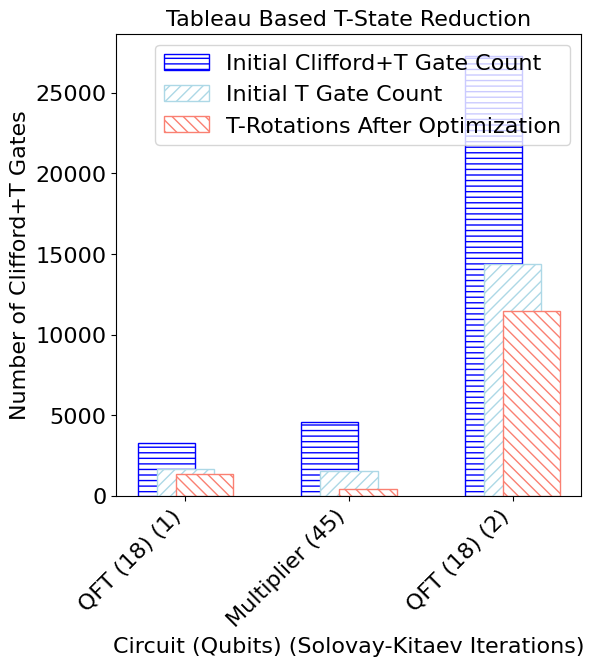

In [44]:
width = 0.35

labels = ['QFT (18) (1)', 'Multiplier (45)', 'QFT (18) (2)']

x = np.arange(len(labels))


fig, ax = plt.subplots(figsize=(6, 6))
bars0 = ax.bar(x - width/3, sorted_total_gates[3::], width, 
               label='Initial Clifford+T Gate Count', color="white", edgecolor="blue", hatch='---')

bars1 = ax.bar(x, sorted_raw_t_gates[3::], width, 
               label='Initial T Gate Count', color="white", edgecolor="lightblue", hatch='///')

bars2 = ax.bar(x + width/3, sorted_optimized_t_gates[3::], width, 
               label='T-Rotations After Optimization', color="white", edgecolor="salmon", hatch='\\\\\\')

# bars0 = ax.bar(x - width/3, sorted_total_gates[3::], width, label='Initial Clifford+T Gate Count', color="blue")
# bars1 = ax.bar(x, sorted_raw_t_gates[3::], width, label='Inital T Gate Count', color="lightblue")
# bars2 = ax.bar(x + width/3, sorted_optimized_t_gates[3::], width, label='T-Rotations After Optimization', color="salmon")

ax.set_ylabel('Number of Clifford+T Gates')
ax.set_xlabel('Circuit (Qubits) (Solovay-Kitaev Iterations)')

# ax.set_yscale('log')

ax.set_title('Tableau Based T-State Reduction')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right") 
ax.legend()
plt.savefig('graphics/t_trans_gate2.pdf', format='pdf', bbox_inches='tight')

